Note: This is a project I have done for my university course. As the results are compiled by machine learning, outcome of this file differs every time after a run.

Project Topic:

Finding the relationship between different health attributes and diabetes

Description:

Diabetes has been a major cause of death globally, and its cases have been rapidly rising over the recent years. This project aims to discover the relationship between different health attributes and the onset of diabetes, and through comparison and analysis, to conclude the major health risk factors that most likely lead to this disease. Then, the outcomes from this study can be used to assist early risk screenings to help the prevention of diabetes. 

This project uses the Pima Indians Diabetes Database, with a collection of patient health attributes and whether they have diabetes. First, data is retrieved, cleaned and processed from the dataset, then summarized through tables. Next, the relationship between health attributes from the data and onset of diabetes is shown by finding their feature significance, through predictions by machine learning algorithms and curve fitting, with results presented in both graphs and text summarization. The major attributes relating to diabetes onset are found. Finally, there would be a conclusion to show the outcome of the project, with recommendations on diabetes prevention measures based on the result. References along with the dataset link are also inserted at the bottom of the file.

In [16]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression

In [17]:
# Reading data
df = pd.read_csv("diabetes.csv")

# Visualizing first 5 rows of data before cleaning
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


DiabetesPedigreeFunction refers to the risk of having diabetes due to familial history

In [18]:
# Checking for null values
nullcheck = df.isnull().values.any()
if nullcheck == True:
    print("There are null values")
else:
    print("There are no null values")

# Checking for zero values except outcome column
zerocheck = (0 in df.values[:,0:-1])
if zerocheck == True:
    print("There are zero values")
else:
    print("There are no zero values")

There are no null values
There are zero values


In [19]:
# Replacing zero values with mean of that column except outcome column
for column in df.iloc[:,:-1].columns:
    df[column] = df[column].replace(0, value = df[column].mean())

# Visualizing first 5 rows of data after cleaning
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [20]:
# Separating attribute columns from data
preg = df.loc[:, "Pregnancies"]
gluc = df.loc[:, "Glucose"]
bp = df.loc[:, "BloodPressure"]
st = df.loc[:, "SkinThickness"]
ins = df.loc[:, "Insulin"]
bmi = df.loc[:, "BMI"]
risk = df.loc[:, "DiabetesPedigreeFunction"]
age = df.loc[:, "Age"]
outcome = df.loc[:, "Outcome"]

# Reshaping data for fitting into machine learning model
preg = np.array(preg).reshape(-1,1)
gluc = np.array(gluc).reshape(-1,1)
bp = np.array(bp).reshape(-1,1)
st = np.array(st).reshape(-1,1)
ins = np.array(ins).reshape(-1,1)
bmi = np.array(bmi).reshape(-1,1)
risk = np.array(risk).reshape(-1,1)
age = np.array(age).reshape(-1,1)

# Since "outcome" attribute is a 0 or 1 categorial value, there is no need to reshape it into a 2D array

In [21]:
# Summarizing Data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the table, there are a total of 768 sets of patient data. The mean, standard deviation, minimum, lower quartile, median, upper quartile and maximum are shown for each attribute from the table.

In [22]:
# Fitting attribute data into machine learning model and finding its feature importance (how significant it affects the outcome)
model = LogisticRegression()

model.fit(preg, outcome)
score1 = float(model.coef_[0])


model.fit(gluc, outcome)
score2 = float(model.coef_[0])


model.fit(bp, outcome)
score3 = float(model.coef_[0])


model.fit(st, outcome)
score4 = float(model.coef_[0])


model.fit(ins, outcome)
score5 = float(model.coef_[0])


model.fit(bmi, outcome)
score6 = float(model.coef_[0])


model.fit(risk, outcome)
score7 = float(model.coef_[0])


model.fit(age, outcome)
score8 = float(model.coef_[0])

In [23]:
# Adding results of feature importance into a dictionary for sorting
scores = {}
scores["preg"] = score1
scores["gluc"] = score2
scores["bp"] = score3
scores["st"] = score4
scores["ins"] = score5
scores["bmi"] = score6
scores["risk"] = score7
scores["age"] = score8

# Sorting the results
sortedscores = sorted(scores.items(), key = lambda x:x[1])                 

# Printing sorted results
for item in sortedscores:
    print(f"Feature importance of {item[0]}: {item[1]}")

Feature importance of ins: 0.004016043769868382
Feature importance of bp: 0.028976548403517013
Feature importance of st: 0.03820170580412261
Feature importance of gluc: 0.0406023796996256
Feature importance of age: 0.04202466194720762
Feature importance of bmi: 0.1028432806836262
Feature importance of preg: 0.174144941968151
Feature importance of risk: 1.0269736488973917


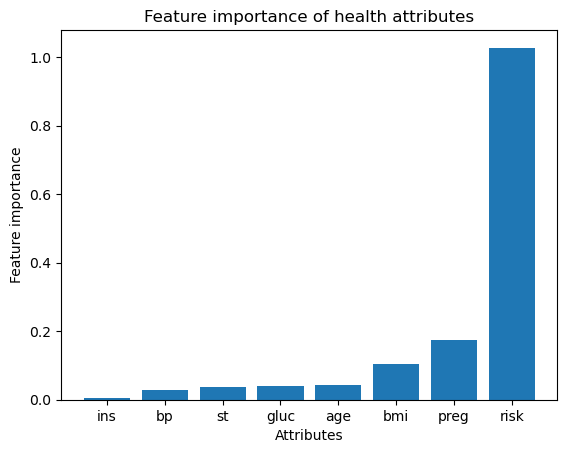

In [24]:
# Visualizing results
x = []
y = []
for i in sortedscores:
    x.append(i[0])
    y.append(i[1])
plt.bar(x,y)
plt.title("Feature importance of health attributes")
plt.xlabel("Attributes")
plt.ylabel("Feature importance")
__ = plt

Feature importance of familial risk is far much higher than any other attributes. Pregnancy and BMI also have relatively high feature importance compared to the rest, but still much less than familial risk. Insulin level has the lowest feature importance. 

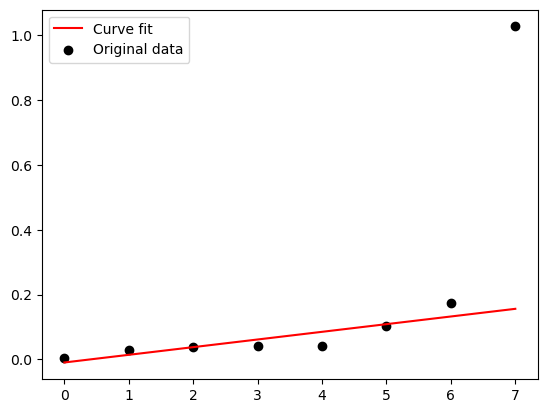

In [25]:
# Curve fitting from 'ins' to 'preg'
# Attributes are referred as indexes from 0 to 7
x = [0, 1, 2, 3, 4, 5, 6, 7]
x = np.array(x).reshape(-1,1)
model = LinearRegression()
model.fit(x[0:7],y[0:7])
plt.plot(x, model.predict(x), color = "red", label = "Curve fit")
plt.scatter(x, y, color = "black", label = "Original data")
plt.legend()
__ = plt

This graph showed how there is a gradual increase trend of feature importance from insulin level to pregnancy, but suddenly increased way out of proportion for familial risk. This shows how high the feature importance of familial risk is.

From the two graphs, familial risk has much higher feature importance than other attributes. This means that it is the most decisive factor with regard to diabetes onset. Pregnancy and BMI are also relevant, but far less than familial risk. Insulin is the least significant factor related to diabetes onset.

In summary, after analyzing patient data related to diabetes, finding out the feature importance and its trend of various health attributes, it can be concluded that familial risk is the most significant factor for diabetes. In response to this, patients can be encouraged to take early risk screenings to assess this risk; and if one falls into the category of having high familial risk, more frequent regular checkups of this disease can be done to enhance prevention. Besides, those with pregnancies and high BMI should also be encouraged to monitor their conditions to help prevent diabetes onset. And above all of this, it is important to maintain a healthy lifestyle besides medical screenings to reduce diabetes risk.

References:

Learning, UCI Machine. “Pima Indians Diabetes Database.” Kaggle, October 6, 2016. https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database.